# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Шаг 1

Откройте файл с данными и изучите общую информацию
Путь к файлу: /datasets/games.csv. Скачать датасет

In [1]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, вот наш файл открыт. Что видим: у нас 11 столбцов, есть пропуски. Два типа данных: `float64, object` . Пока сложно сказать, но возможно будем типы данных менять. Строк у нас 16715. Названия столбцов "скачут", будем переименовывать. 

**Наши колонки:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Шаг 2. Подготовьте данные

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [4]:
#меняем названия столбцов
data = data.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year', 'Genre':'genre',
                           'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales',
                           'Other_sales':'other_sales', 'Critic_Score':'critic_score', 'User_Score':'user_score',
                           'Rating':'rating'})
data.head()

name platform    year         genre  na_sales  \
0                Wii Sports      Wii  2006.0        Sports     41.36   
1         Super Mario Bros.      NES  1985.0      Platform     29.08   
2            Mario Kart Wii      Wii  2008.0        Racing     15.68   
3         Wii Sports Resort      Wii  2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [5]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Из-за этого tbd не возможно перевести колонку в тип float. Говорит о том, что рейтинг или оценка еще не известны. Дабы это обойти, заменим на -1.

In [6]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**обозначения:**
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone».
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- «AO» («Adults Only 18+») — «Только для взрослых»:  Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры. Первой игрой, которая получила данный рейтинг, стала The Joy of Sex, выпущенная в 1993 году.
- «RP» («Rating Pending») — «Рейтинг ожидается»

Спасибо, Википедия!))

предлагаю пропуски тут заменить на RP, а К-А на Е. 

In [7]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = '-1'
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '-1', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [9]:
#изменим тип данных
data['user_score'] = data['user_score'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16715 non-null  object 
 2   year          16446 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16715 non-null  float64
 5   eu_sales      16715 non-null  float64
 6   jp_sales      16715 non-null  float64
 7   other_sales   16715 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    10014 non-null  float64
 10  rating        9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [10]:
#проверим дубликаты
data.duplicated().sum()

0

In [11]:
data[data.duplicated()].head()

Empty DataFrame
Columns: [name, platform, year, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []

Дубликаты отсутствуют, это хорошо

In [12]:
#проверим пропуски
data.isna().sum()

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
rating          6766
dtype: int64

In [13]:
data.isna().mean()*100

name             0.011965
platform         0.000000
year             1.609333
genre            0.011965
na_sales         0.000000
eu_sales         0.000000
jp_sales         0.000000
other_sales      0.000000
critic_score    51.319174
user_score      40.089740
rating          40.478612
dtype: float64

Что по пропускам: в году у нас 269 игр не имеют дату выхода. 8578 не имеют оценки критиков, 6701 не имеет оценки пользователей и 6766 не имеют рейтинга. Ну такое...слишком большая доля пропусков. 

*На что можно заменить года. Я заменю их пока на 0, потому что невозможно даже предугадать дату выхода.*
 - **ПРАВКА: Доля пропущеных значений по годам 1.6%, можно удалить те игры, где год пропущен. Доля пропущенных значений в имени 0.01%, тем более можно удалить. Пропуски в оценках заменяем на -2**  


In [14]:
data['critic_score'] = data['critic_score'].fillna(-2)
data['user_score'] = data['user_score'].fillna(-2)
data['rating'] = data['rating'].fillna('RP')
data = data.dropna(subset=['year', 'name', 'genre'])
data.isna().sum()

name            0
platform        0
year            0
genre           0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
critic_score    0
user_score      0
rating          0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   year          16444 non-null  float64
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  16444 non-null  float64
 9   user_score    16444 non-null  float64
 10  rating        16444 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Итак, мы убедились, что все пропуски заполнены, типы данных верные.

In [16]:
#Посчитайем суммарные продажи во всех регионах и запишите их в отдельный столбец
data['all_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

name platform    year         genre  na_sales  \
0                Wii Sports      Wii  2006.0        Sports     41.36   
1         Super Mario Bros.      NES  1985.0      Platform     29.08   
2            Mario Kart Wii      Wii  2008.0        Racing     15.68   
3         Wii Sports Resort      Wii  2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  all_sales  
0     28.96      3.77         8.45          76.0         8.0      E      82.54  
1      3.58      6.81         0.77          -2.0        -2.0     RP      40.24  
2     12.76      3.79         3.29          82.0         8.3      E      35.52  
3     10.93      3.28         2.95          80.0         8.0      E      32.77  
4      8.89     10.22         1.00          -2.0        -2.0     RP      31.38

In [17]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16444 non-null  object 
 1   platform      16444 non-null  object 
 2   year          16444 non-null  float64
 3   genre         16444 non-null  object 
 4   na_sales      16444 non-null  float64
 5   eu_sales      16444 non-null  float64
 6   jp_sales      16444 non-null  float64
 7   other_sales   16444 non-null  float64
 8   critic_score  16444 non-null  float64
 9   user_score    16444 non-null  float64
 10  rating        16444 non-null  object 
 11  all_sales     16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name : кол-во NaN 0 , процент NaN 0.0 %
-------------

## Шаг 3. Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [18]:
data['year'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.])

У нас есть данные от 1980 до 2016 года. Сгруппируем по годам все строки и посчитаем в каждом году количество игр

In [19]:
data.groupby('year')['name'].count()

year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

<AxesSubplot:xlabel='year'>

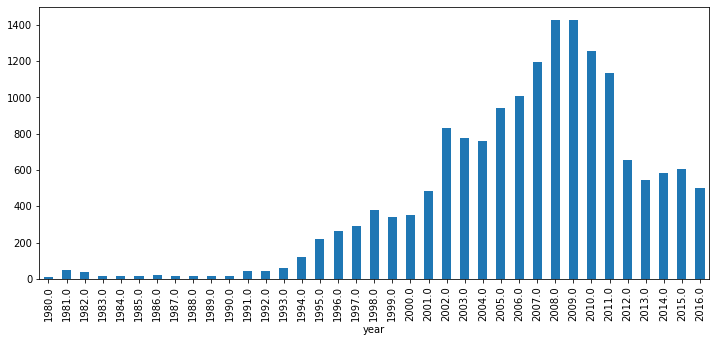

In [20]:
data.groupby('year')['name'].count().plot(kind='bar', figsize=(12,5))

В целом, выпуск игр за каждый год - это интересная статистика, но так как мы будем строить прогноз на 2017 год, то интересуют нас в основном последние 5 лет, а именно 2012-2016 года, самые главные ориентир - 2016 год. Вернемся к этому в пункте 3.3 

### Как менялись продажи по платформам. Выбераем платформы с наибольшими суммарными продажами и строим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [21]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [22]:
data.groupby('platform')['all_sales'].sum().sort_values()

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       53.81
WiiU      82.19
2600      86.48
XOne     159.32
GC       196.73
SNES     200.04
N64      218.01
NES      251.05
XB       251.57
GB       254.43
PC       255.76
3DS      257.81
PSP      289.53
GBA      312.88
PS4      314.14
PS       727.58
DS       802.78
Wii      891.18
PS3      931.34
X360     961.24
PS2     1233.56
Name: all_sales, dtype: float64

<AxesSubplot:xlabel='platform'>

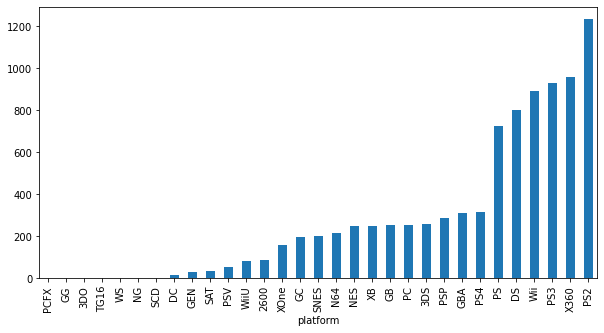

In [23]:
data.groupby('platform')['all_sales'].sum().sort_values().plot(kind='bar', figsize=(10,5))

Выберем три платформы с наиболее высокими продажами: 
   - `PS3` - 939.65, 
   - `X360` - 971.42, 
   - `PS2` - 1255.77

**PS3**

In [24]:
#строим распределение продаж по годам для платформы PS3
data_ps3 = data.query('platform == "PS3"')
data_ps3 = data_ps3.pivot_table(index='year', values='all_sales', aggfunc='sum')
data_ps3.reset_index()

year  all_sales
0   2006.0      20.96
1   2007.0      73.19
2   2008.0     118.52
3   2009.0     130.93
4   2010.0     142.17
5   2011.0     156.78
6   2012.0     107.36
7   2013.0     113.25
8   2014.0      47.76
9   2015.0      16.82
10  2016.0       3.60

<AxesSubplot:xlabel='year'>

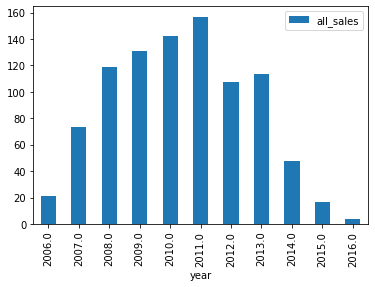

In [25]:
data_ps3.plot(kind='bar')

Большинство игр было продано в 2010 и 2011 году

**X360**

<AxesSubplot:xlabel='year'>

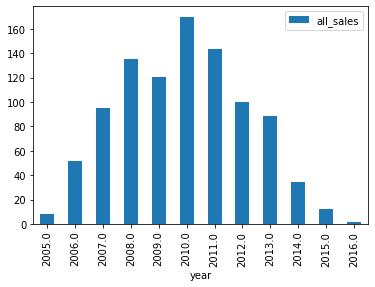

In [26]:
#строим распределение продаж по годам для платформы X360
data_x360 = data.query('platform == "X360"')
data_x360 = data_x360.pivot_table(index='year', values='all_sales', aggfunc='sum')
data_x360.reset_index()
data_x360.plot(kind='bar')

Основная масса игр была продана так же в 2010 году

**PS2**

<AxesSubplot:xlabel='year'>

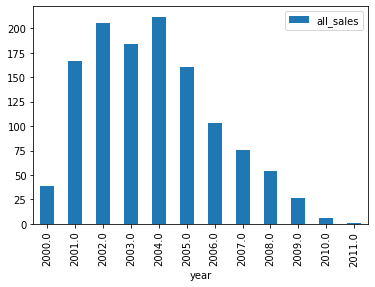

In [27]:
#строим распределение продаж по годам для платформы PS2
data_ps2 = data.query('platform == "PS2"')
data_ps2 = data_ps2.pivot_table(index='year', values='all_sales', aggfunc='sum')
data_ps2.reset_index()
data_ps2.plot(kind='bar')

Здесь ситуация изменилась, виной всему отсутствие выпуска игр на жту платформу с 2012 года. Так, большинство игр было продано в 2002 и 2004 годах.

### Данные за соответствующий актуальный период. 


In [28]:
#создадим новый датафрейм, куда поместим информацию по играм выпуска 2012-2016гг.  
data_1216 = data.query('year == [2016, 2015, 2014, 2013, 2012]')
data_1216.head()

name platform    year         genre  na_sales  \
16          Grand Theft Auto V      PS3  2013.0        Action      7.02   
23          Grand Theft Auto V     X360  2013.0        Action      9.66   
31   Call of Duty: Black Ops 3      PS4  2015.0       Shooter      6.03   
33         Pokemon X/Pokemon Y      3DS  2013.0  Role-Playing      5.28   
34  Call of Duty: Black Ops II      PS3  2012.0       Shooter      4.99   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
16      9.09      0.98         3.96          97.0         8.2      M   
23      5.14      0.06         1.41          97.0         8.1      M   
31      5.86      0.36         2.38          -2.0        -2.0     RP   
33      4.19      4.35         0.78          -2.0        -2.0     RP   
34      5.73      0.65         2.42          83.0         5.3      M   

    all_sales  
16      21.05  
23      16.27  
31      14.63  
33      14.60  
34      13.79

### Выбор потенциально прибыльных платформ.

In [29]:
data_1216.groupby('platform')['all_sales'].sum().sort_values()

platform
PSP      11.19
DS       12.55
Wii      35.37
PSV      49.18
PC       62.65
WiiU     82.19
XOne    159.32
3DS     194.61
X360    236.54
PS3     288.79
PS4     314.14
Name: all_sales, dtype: float64

За последние 5 лет рейтинг популярных и прибыльных платформ изменился. Теперь можно выделить 5 платформ, значительно оторвавшихся от других:
   - `XOne`    159.32
   - `3DS`     194.61
   - `X360`    236.54
   - `PS3`     288.79
   - `PS4`     314.14

<AxesSubplot:xlabel='year'>

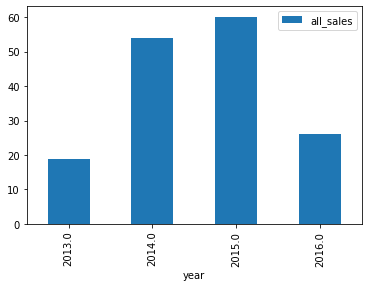

In [30]:
#заново строим распределение продаж по годам для платформ
data_XOne = data_1216.query('platform == "XOne"')
data_XOne = data_XOne.pivot_table(index='year', values='all_sales', aggfunc='sum')
data_XOne.reset_index()
data_XOne.plot(kind='bar')

Пик популярности игр на этой платформе был в 2015 году, 2016 значительный спад.

<AxesSubplot:xlabel='year'>

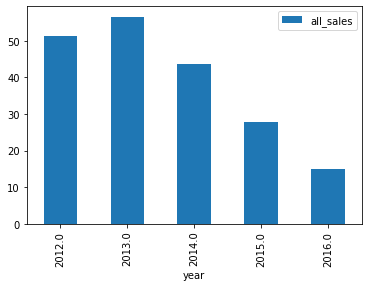

In [31]:
data_3DS = data_1216.query('platform == "3DS"')
data_3DS = data_3DS.pivot_table(index='year', values='all_sales', aggfunc='sum')
data_3DS.reset_index()
data_3DS.plot(kind='bar')

3DS теряла свою популярность постепенно, начиная с 2013 года.

<AxesSubplot:xlabel='year'>

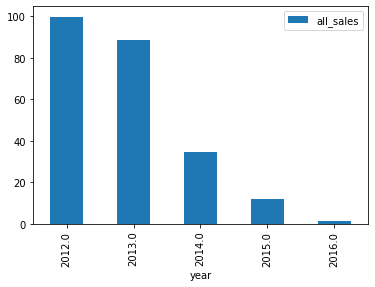

In [32]:
data_X360 = data_1216.query('platform == "X360"')
data_X360 = data_X360.pivot_table(index='year', values='all_sales', aggfunc='sum')
data_X360.reset_index()
data_X360.plot(kind='bar')

На этой платформе ситуация в 2015 и 2016 годах вообще крайне не очень) Наибольшее количество продаж было в 2012 году, а с 2014 резкий спад.

<AxesSubplot:xlabel='year'>

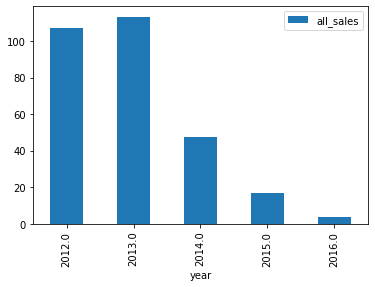

In [33]:
data_PS3 = data_1216.query('platform == "PS3"')
data_PS3 = data_PS3.pivot_table(index='year', values='all_sales', aggfunc='sum')
data_PS3.reset_index()
data_PS3.plot(kind='bar')

Аналогично и предыдущей платформе видим резкий спад с 2014 год. а пик приходился на 2013 год. 

<AxesSubplot:xlabel='year'>

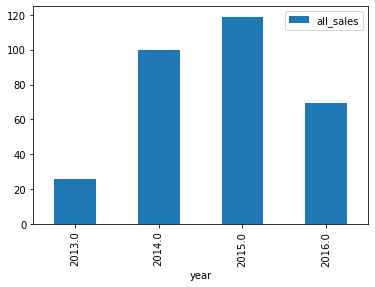

In [34]:
data_PS4 = data_1216.query('platform == "PS4"')
data_PS4 = data_PS4.pivot_table(index='year', values='all_sales', aggfunc='sum')
data_PS4.reset_index()
data_PS4.plot(kind='bar')

Выход новой модели консоли PS вызвал спад продаж игр на предыдущую версию. Но при этом видно что в 2016 году продаж было меньше, чем в пиковый 2015 год.

In [35]:
#посмотрим в сравнении 2015 и 2016 года
data_1216.query('year == [2015,2016]').groupby('year').sum()

na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
year                                                                          
2015.0    106.86     96.72     34.09        30.31       15634.0      1399.8   
2016.0     44.93     51.22     19.31        14.48       16432.0      1291.0   

        all_sales  
year               
2015.0     267.98  
2016.0     129.94

*неактуалочка... Что видим, что продажи 2016 года почти в два раза ниже. Но если вспомнить, у нас были игры без указания года, их было 269. Хочу посмотреть для какой платформы их покупали, для новых или старых.*

In [36]:
#data.query('year == ').groupby('platform').sum()

*неактуалочка 2.0 так как нет платформы PS4, можно сделать вывод, что это старые игры и они нас мало интересуют.*

В какчестве лидирующий платформ берем все 5

In [37]:
data_lider = data_1216.query('platform == ["PS4", "PS3", "X360", "3DS", "XOne"]')
data_lider.head()

name platform    year         genre  na_sales  \
16          Grand Theft Auto V      PS3  2013.0        Action      7.02   
23          Grand Theft Auto V     X360  2013.0        Action      9.66   
31   Call of Duty: Black Ops 3      PS4  2015.0       Shooter      6.03   
33         Pokemon X/Pokemon Y      3DS  2013.0  Role-Playing      5.28   
34  Call of Duty: Black Ops II      PS3  2012.0       Shooter      4.99   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
16      9.09      0.98         3.96          97.0         8.2      M   
23      5.14      0.06         1.41          97.0         8.1      M   
31      5.86      0.36         2.38          -2.0        -2.0     RP   
33      4.19      4.35         0.78          -2.0        -2.0     RP   
34      5.73      0.65         2.42          83.0         5.3      M   

    all_sales  
16      21.05  
23      16.27  
31      14.63  
33      14.60  
34      13.79

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

<AxesSubplot:xlabel='platform', ylabel='all_sales'>

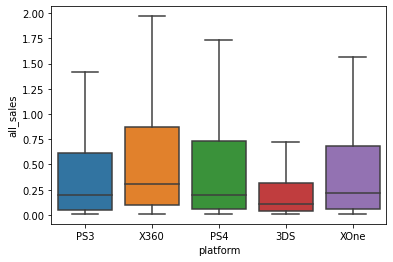

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=data_lider, x="platform", y="all_sales", showfliers = False)
# с помощью параметра showfliers мы убрали все выбросы

[(0.0, 1.0)]

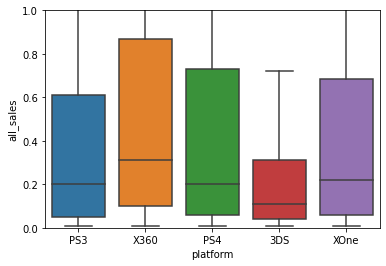

In [39]:
a=sns.boxplot(data=data_lider, x="platform", y="all_sales", showfliers = False)
a.set(ylim=(0,1))

На графике видно, что платформа 3DS значительно отстает

**медиана**
- PS3 - 0.2
- X360 - 0.3
- PS4 - 0.2
- 3DS - 0.1
- XOne - 0.2

**Q1  и  Q2**
- PS3 - 0.05 / 0.6
- X360 - 0.01 / 0.9
- PS4 - 0.05 / 0.7
- 3DS - 0.03 / 0.3
- XOne - 0.05 / 0.65



### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Строим диаграмму рассеяния и считаем корреляцию между отзывами и продажами.

In [40]:
data_lider.head()

name platform    year         genre  na_sales  \
16          Grand Theft Auto V      PS3  2013.0        Action      7.02   
23          Grand Theft Auto V     X360  2013.0        Action      9.66   
31   Call of Duty: Black Ops 3      PS4  2015.0       Shooter      6.03   
33         Pokemon X/Pokemon Y      3DS  2013.0  Role-Playing      5.28   
34  Call of Duty: Black Ops II      PS3  2012.0       Shooter      4.99   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
16      9.09      0.98         3.96          97.0         8.2      M   
23      5.14      0.06         1.41          97.0         8.1      M   
31      5.86      0.36         2.38          -2.0        -2.0     RP   
33      4.19      4.35         0.78          -2.0        -2.0     RP   
34      5.73      0.65         2.42          83.0         5.3      M   

    all_sales  
16      21.05  
23      16.27  
31      14.63  
33      14.60  
34      13.79

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

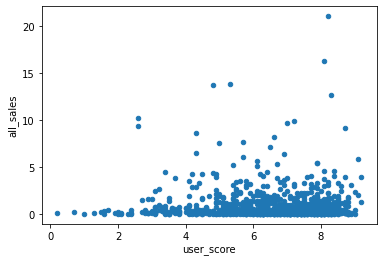

In [53]:
data_lider.query('user_score > 0').plot(x='user_score', 
                                        y='all_sales', 
                                        kind='scatter')

Если посмотреть общую картину, то среди пользователей лидирует оценка 8. А корреляция 0.04, что говорит о почти нулевой зависимости покупок от оценки пользователей. 

In [54]:
us_corr = data_1216.query('user_score>0').reset_index()
us_corr['user_score'].corr(us_corr['all_sales'])

0.0044288176754932575

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

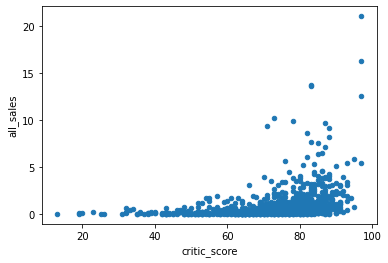

In [55]:
data_lider.query('critic_score > 0').plot(x='critic_score', 
                                        y='all_sales', 
                                        kind='scatter')

In [56]:
cr_corr = data_1216.query('critic_score>0').reset_index()
cr_corr['critic_score'].corr(cr_corr['all_sales'])

0.3081967459207781

Если псомотреть на оценки критиков, то больше покупок игр с оценками от 80 до 100. Корреляция тут 0.3, что значительно больще чем в оценках пользователей, то все так же достаточно мало, чтобы можно было сказать о прямой зависимости.

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

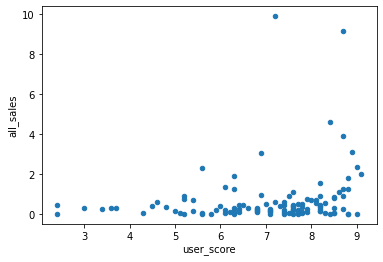

In [57]:
#рассмотрим оценки и корреляции в разрезе каждой платформы
data_1216.query('platform == "3DS" and user_score>0').plot(x='user_score', 
                                                                       y='all_sales', 
                                                                       kind='scatter')

In [58]:
DS = data_1216.query('platform == "3DS" and user_score>0').reset_index()
DS['user_score'].corr(DS['all_sales'])

0.19758263411038599

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

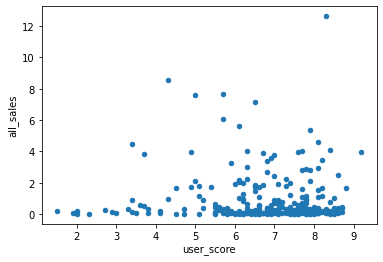

In [59]:
data_lider.query('platform == "PS4" and user_score > 0').plot(x='user_score', 
                                                                       y='all_sales', 
                                                                       kind='scatter')

In [60]:
PS4 = data_lider.query('platform == "PS4" and user_score > 0').reset_index()
PS4['user_score'].corr(PS4['all_sales'])

-0.031957110204556376

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

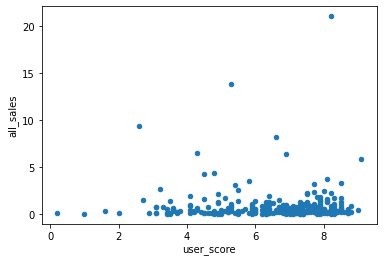

In [61]:
data_lider.query('platform == "PS3" and user_score > 0').plot(x='user_score', 
                                                              y='all_sales', 
                                                              kind='scatter')

In [62]:
PS3 = data_lider.query('platform == "PS3" and user_score > 0').reset_index()
PS3['user_score'].corr(PS3['all_sales'])

-0.005143522887113828

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

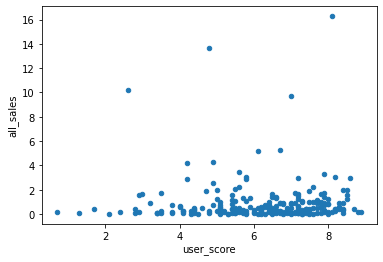

In [63]:
data_lider.query('platform == "X360" and user_score > 0').plot(x='user_score', 
                                                                       y='all_sales', 
                                                                       kind='scatter')

In [64]:
X360 = data_lider.query('platform == "X360" and user_score > 0').reset_index()
X360['user_score'].corr(X360['all_sales'])

0.006163978646213326

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

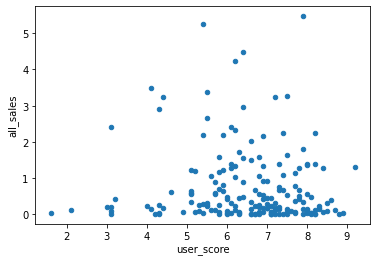

In [65]:
data_1216.query('platform == "XOne" and user_score>0').plot(x='user_score', 
                                                                       y='all_sales', 
                                                                       kind='scatter')

In [66]:
XOne = data_lider.query('platform == "XOne" and user_score>0').reset_index()
XOne['user_score'].corr(XOne['all_sales'])

-0.06892505328279414

Платформы:
- XOne : Больше покупок у оценрк 5, 8. Корреляция почти нулевая

- X360 : Лидирует так же оценка 5 и 8, корреляция почти на нуле

- PS3 : Оценка 8, корреляция тоже нулевая

- PS4 : Оценка 8 и 4, кореляция так же ноль

- 3DS : Оценка 7 и 8,5. Но корреляция здесь больше, чем на других платформах, но все же ближе к нулю

Можно сделать вывод, что нет зависимости покупки от рейтинга пользователей

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

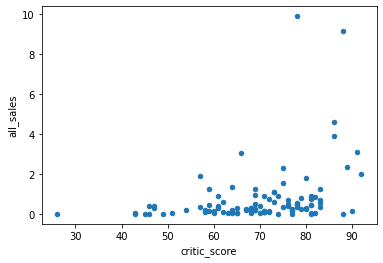

In [67]:
data_1216.query('platform == "3DS" and critic_score>0').plot(x='critic_score', 
                                                                       y='all_sales', 
                                                                       kind='scatter')

In [68]:
DS = data_lider.query('platform == "3DS" and critic_score>0').reset_index()
DS['critic_score'].corr(DS['all_sales'])

0.3208028695360785

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

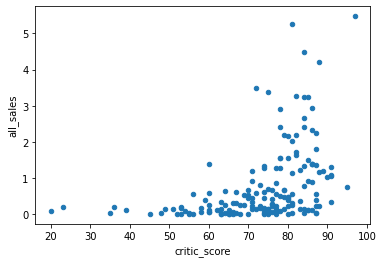

In [69]:
data_1216.query('platform == "XOne" and critic_score>0').plot(x='critic_score', 
                                                                       y='all_sales', 
                                                                       kind='scatter')

In [70]:
XOne = data_lider.query('platform == "XOne" and critic_score>0').reset_index()
XOne['critic_score'].corr(XOne['all_sales'])

0.4169983280084017

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

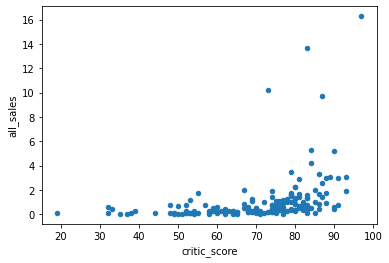

In [71]:
data_1216.query('platform == "X360" and critic_score>0').plot(x='critic_score', 
                                                                       y='all_sales', 
                                                                       kind='scatter')

In [72]:
X360 = data_lider.query('platform == "X360" and critic_score>0').reset_index()
X360['critic_score'].corr(X360['all_sales'])

0.3605734888507336

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

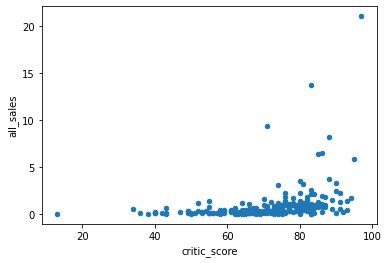

In [73]:
data_1216.query('platform == "PS3" and critic_score>0').plot(x='critic_score', 
                                                                       y='all_sales', 
                                                                       kind='scatter')

In [74]:
PS3 = data_lider.query('platform == "PS3" and critic_score>0').reset_index()
PS3['critic_score'].corr(PS3['all_sales'])

0.3314972592629587

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

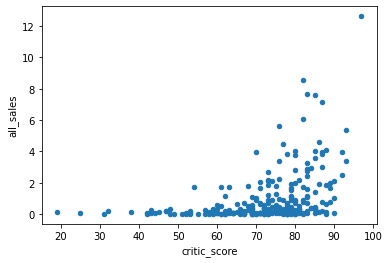

In [75]:
data_1216.query('platform == "PS4" and critic_score>0').plot(x='critic_score', 
                                                                       y='all_sales', 
                                                                       kind='scatter')

In [76]:
PS4 = data_lider.query('platform == "PS4" and critic_score>0').reset_index()
PS4['critic_score'].corr(PS4['all_sales'])

0.40656790206178095

Не смотря на то, что корреляция здесь тоже везде близка к нулю, все же зависимость от оценки критиков гораздо больше, чем от отценки пользователей, хотя сильной назвать ее нельзя.
Пользователи больше покупают игры с оценкой критиков от 90 до 100, хотя на платформе 3DS больше покупок с оценкой 70-85

<AxesSubplot:xlabel='critic_score', ylabel='all_sales'>

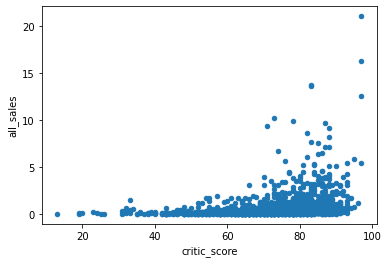

In [77]:
#посмотрим еще общую картину по всем платформам
data_1216.query('critic_score>0').plot(x='critic_score', 
                                        y='all_sales', 
                                        kind='scatter')

In [78]:
all_cr = data_1216.query('critic_score>0').reset_index()
all_cr['critic_score'].corr(all_cr['all_sales'])

0.3081967459207781

<AxesSubplot:xlabel='user_score', ylabel='all_sales'>

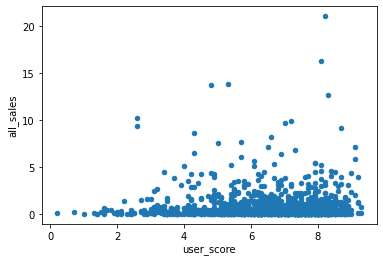

In [79]:
data_1216.query('user_score>0').plot(x='user_score', 
                                        y='all_sales', 
                                        kind='scatter')

In [80]:
all_us = data_1216.query('user_score>0').reset_index()
all_us['user_score'].corr(all_us['all_sales'])

0.0044288176754932575

Да, вывод тут такой же, так же пользовательские оценки меньше влияют, чем критиков, но и то и то не имеет прямой зависимости. Оценка пользователей - 8, оценка критиков - 90-100

### Смотрим общее распределение игр по жанрам. 

In [81]:
data_lider.groupby('genre')['all_sales'].median().sort_values()

genre
Adventure       0.060
Puzzle          0.070
Strategy        0.085
Simulation      0.130
Misc            0.150
Action          0.170
Fighting        0.180
Role-Playing    0.200
Platform        0.210
Racing          0.225
Sports          0.390
Shooter         0.585
Name: all_sales, dtype: float64

<AxesSubplot:xlabel='genre', ylabel='all_sales'>

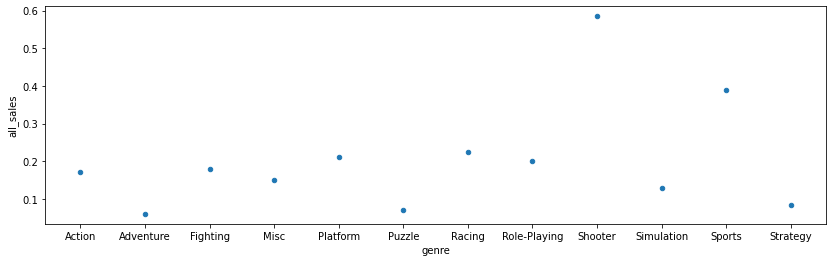

In [82]:
data_lider.groupby('genre')['all_sales'].median().reset_index().plot(x='genre', y='all_sales', kind='scatter', figsize=(14,4))

Три жанра значительно вырываются вперед: Racing, Sports, Shooter

In [83]:
#сравним с популярными жанрами в 2015 и 2016 годах
data_lider.query('year == [2015,2016]').groupby('genre')['all_sales'].median().sort_values()

genre
Adventure       0.050
Misc            0.050
Puzzle          0.060
Strategy        0.070
Action          0.080
Racing          0.085
Fighting        0.095
Platform        0.100
Sports          0.140
Simulation      0.160
Role-Playing    0.165
Shooter         0.490
Name: all_sales, dtype: float64

<AxesSubplot:xlabel='genre', ylabel='all_sales'>

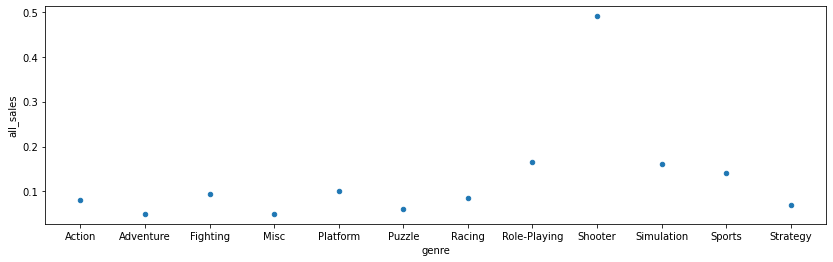

In [84]:
data_lider.query('year == [2015,2016]').groupby('genre')['all_sales'].median().reset_index().plot(
    x='genre', y='all_sales', kind='scatter', figsize=(14,4))

Лидеры сменились. За последние два года чаще покупают Simulation, Role-Playing, Shooter

## Шаг 4. Портрет пользователя каждого региона
Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Платформы топ-5

In [85]:
#делим пользователей по регионам, за основу возьмем общую таблицу за 12-16 года
data_1216.groupby('platform')['na_sales'].sum().sort_values()

platform
PSP       0.13
DS        4.59
PSV      10.98
Wii      17.45
PC       19.12
WiiU     38.10
3DS      55.31
XOne     93.12
PS3     103.38
PS4     108.74
X360    140.05
Name: na_sales, dtype: float64

В Северной Америке топ-5 платформ: 
- 3DS   -   55.31
- XOne  -   93.12
- PS3  -   103.38
- PS4  -   108.74
- ЛИДЕР **X360**  -  140.05

In [86]:
data_1216.groupby('platform')['eu_sales'].sum().sort_values()

platform
PSP       0.42
DS        3.53
PSV      11.36
Wii      11.92
WiiU     25.13
PC       37.76
3DS      42.64
XOne     51.59
X360     74.52
PS3     106.86
PS4     141.09
Name: eu_sales, dtype: float64

В Европе:
- 3DS   -   42.64
- XOne   -  51.59
- X360  -   74.52
- PS3   -  106.86
- ЛИДЕР **PS4**   -  141.09

In [87]:
data_1216.groupby('platform')['jp_sales'].sum().sort_values()

platform
PC       0.00
XOne     0.34
X360     1.57
Wii      3.39
DS       3.72
PSP     10.47
WiiU    13.01
PS4     15.96
PSV     21.04
PS3     35.29
3DS     87.79
Name: jp_sales, dtype: float64

Топ-5 в Японии:
- WiiU  -  13.01
- PS4   -  15.96
- PSV  -   21.04
- PS3   -  35.29
- ЛИДЕР **3DS**  -   87.79

Если в Америке и Европе примерно одинаковые популярные платфоомы, то в Японии это совершенно другие

Text(0.5, 1.0, 'JP')

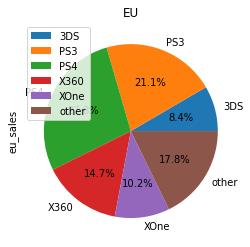

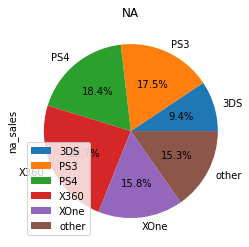

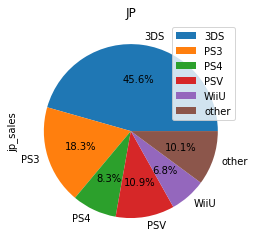

In [88]:
#создали новые датафраймы по каждому региону
#и создадим сводные таблицы, где у нас будет по 5 лидирующих платформ и остальные
eu_plat = data_1216.pivot_table(index='platform', values = 'eu_sales', aggfunc = 'sum' ).reset_index()
na_plat = data_1216.pivot_table(index='platform', values = 'na_sales', aggfunc = 'sum' ).reset_index()
jp_plat = data_1216.pivot_table(index='platform', values = 'jp_sales', aggfunc = 'sum' ).reset_index()

eu_p = eu_plat.query('platform == ["3DS","XOne","X360","PS3","PS4"]')
eu_1_plat = eu_plat.query('platform != ["3DS","XOne","X360","PS3","PS4"]')
eu_1_plat = {'platform':'other', 'eu_sales': 90.12}
eu_p = eu_p.append(eu_1_plat, ignore_index=True)

na_p = na_plat.query('platform == ["3DS","XOne","PS3","PS4","X360"]')
na_1_plat = na_plat.query('platform != ["3DS","XOne","PS3","PS4","X360"]')
na_1_plat = {'platform':'other', 'na_sales': 90.37}
na_p = na_p.append(na_1_plat, ignore_index=True)

jp_p = jp_plat.query('platform == ["WiiU","PS4","PSV","PS3","3DS"]')
jp_1_plat = jp_plat.query('platform != ["WiiU","PS4","PSV","PS3","3DS"]')
jp_1_plat = {'platform':'other', 'jp_sales': 19.48}
jp_p = jp_p.append(jp_1_plat, ignore_index=True)


eu_p.groupby(['platform']).sum().plot(y='eu_sales', kind='pie', autopct='%1.1f%%')
plt.title('EU')
na_p.groupby(['platform']).sum().plot(y='na_sales', kind='pie', autopct='%1.1f%%')
plt.title('NA')
jp_p.groupby(['platform']).sum().plot(y='jp_sales', kind='pie', autopct='%1.1f%%')
plt.title('JP')

### Жанры топ-5

In [89]:
data_1216.groupby('genre')['jp_sales'].sum().sort_values()

genre
Puzzle           2.14
Racing           2.50
Strategy         2.88
Sports           8.01
Adventure        8.24
Platform         8.63
Shooter          9.23
Fighting         9.44
Simulation      10.41
Misc            12.86
Action          52.80
Role-Playing    65.44
Name: jp_sales, dtype: float64

Топ-5 популярных жанров в Японии:
- Fighting      -   9.44
- Simulation   -   10.41
- Misc       -     12.86
- Action     -     52.80
- Role-Playing -   65.44

In [90]:
data_1216.groupby('genre')['na_sales'].sum().sort_values()

genre
Puzzle            1.13
Strategy          4.23
Simulation        7.97
Adventure         8.92
Racing           17.22
Fighting         19.79
Platform         25.38
Misc             38.19
Role-Playing     64.00
Sports           81.53
Shooter         144.77
Action          177.84
Name: na_sales, dtype: float64

В Америке:
- Misc       -      38.19
- Role-Playing-     64.00
- Sports      -     81.53
- Shooter     -    144.77
- Action      -    177.84

In [91]:
data_1216.groupby('genre')['eu_sales'].sum().sort_values()

genre
Puzzle            1.40
Strategy          5.17
Adventure         9.46
Fighting         10.79
Simulation       14.55
Platform         21.41
Misc             26.32
Racing           27.29
Role-Playing     48.53
Sports           69.09
Shooter         113.47
Action          159.34
Name: eu_sales, dtype: float64

В Европе:
- Racing       -    27.29
- Role-Playing -    48.53
- Sports       -    69.09
- Shooter    -     113.47
- Action     -     159.34

В Европе и Америке топ это Action , а вот в Японии Role-Playing. Скорее всего такая разница, что в жанрах, что в платформах связана с разными интересами в странах и культурой среди молодежи и игроманов. 

Text(0.5, 1.0, 'JP')

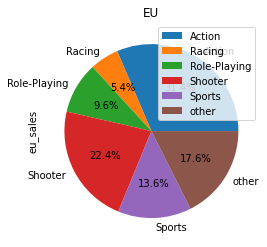

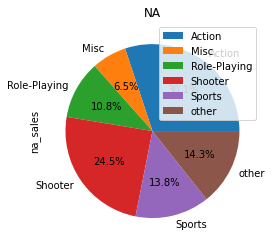

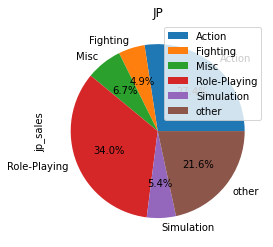

In [92]:
#создали новые датафраймы по каждому региону
#и создадим сводные таблицы, где у нас будет по 5 лидирующих жанров и остальные
eu_genre = data_1216.pivot_table(index='genre', values = 'eu_sales', aggfunc = 'sum' ).reset_index()
na_genre = data_1216.pivot_table(index='genre', values = 'na_sales', aggfunc = 'sum' ).reset_index()
jp_genre = data_1216.pivot_table(index='genre', values = 'jp_sales', aggfunc = 'sum' ).reset_index()

eu = eu_genre.query('genre == ["Action", "Racing", "Role-Playing", "Sports", "Shooter"]')
eu_1 = eu_genre.query('genre != ["Action", "Racing", "Role-Playing", "Sports", "Shooter"]')
eu_1 = {'genre':'other', 'eu_sales': 89.09}
eu = eu.append(eu_1, ignore_index=True)

na = na_genre.query('genre == ["Misc", "Role-Playing", "Sports", "Shooter", "Action"]')
na_1 = na_genre.query('genre != ["Misc", "Role-Playing", "Sports", "Shooter", "Action"]')
na_1 = {'genre':'other', 'na_sales': 84.64}
na = na.append(na_1, ignore_index=True)

jp = jp_genre.query('genre == ["Fighting", "Simulation", "Misc", "Action", "Role-Playing"]')
jp_1 = jp_genre.query('genre != ["Fighting", "Simulation", "Misc", "Action", "Role-Playing"]')
jp_1 = {'genre':'other', 'jp_sales': 41.62}
jp = jp.append(jp_1, ignore_index=True)


eu.groupby(['genre']).sum().plot(y='eu_sales', kind='pie', autopct='%1.1f%%')
plt.title('EU')
na.groupby(['genre']).sum().plot(y='na_sales', kind='pie', autopct='%1.1f%%')
plt.title('NA')
jp.groupby(['genre']).sum().plot(y='jp_sales', kind='pie', autopct='%1.1f%%')
plt.title('JP')

### Рейтинг ESRB

In [93]:
data_1216.groupby('rating')['eu_sales'].sum().sort_values()

rating
T        52.96
E10+     55.37
RP       91.50
E       113.03
M       193.96
Name: eu_sales, dtype: float64

In [94]:
data_1216.groupby('rating')['na_sales'].sum().sort_values()

rating
T        66.02
E10+     75.70
RP      103.31
E       114.37
M       231.57
Name: na_sales, dtype: float64

In [95]:
data_1216.groupby('rating')['jp_sales'].sum().sort_values()

rating
E10+      8.19
M        21.20
T        26.02
E        28.33
RP      108.84
Name: jp_sales, dtype: float64

В Европе и Америке топ - игры с рейтингом М и Е, а вот в Японии - RP и Е. 

«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults")

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

«RP» («Rating Pending») — «Рейтинг ожидается»



In [96]:
data_1216.query('rating == "RP"').groupby('year')['jp_sales'].sum()

year
2012.0    23.79
2013.0    28.15
2014.0    24.01
2015.0    18.57
2016.0    14.32
Name: jp_sales, dtype: float64

Я сначала подумала, что может это игры новые, но нет, такие игр встречаются в каждом году. 

<AxesSubplot:xlabel='year', ylabel='na_sales'>

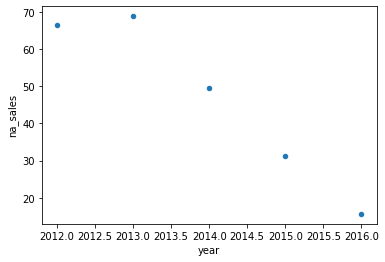

In [97]:
data_1216.query('rating == "M"').groupby('year')['na_sales'].sum().reset_index().plot(
                                                                       x='year', 
                                                                       y='na_sales', 
                                                                       kind='scatter')

<AxesSubplot:xlabel='year', ylabel='eu_sales'>

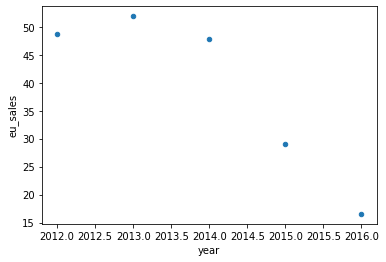

In [98]:
data_1216.query('rating == "M"').groupby('year')['eu_sales'].sum().reset_index().plot(
                                                                       x='year', 
                                                                       y='eu_sales', 
                                                                       kind='scatter')

Рейтинг М - самый популярный вид игр в Европе и Америке, но продажи значительно снилизись в 2015 и 2016 годах

<AxesSubplot:xlabel='year', ylabel='jp_sales'>

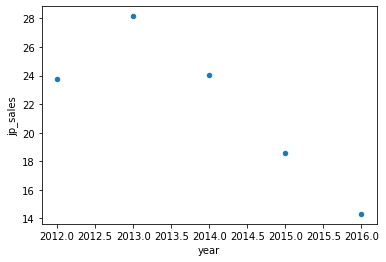

In [99]:
data_1216.query('rating == "RP"').groupby('year')['jp_sales'].sum().reset_index().plot(
                                                                       x='year', 
                                                                       y='jp_sales', 
                                                                       kind='scatter')

В Японии картина похожая, тоже спад продаж, хотя рейтинг игр RP - самый популярный 

В целом зависимость от рейтинга ESRB конечно есть, пользователи покупают игры по интересам, а благодаря этому рейтингу они могут отфильтравать определенные категории. 

## Шаг 5. Проверка гипотез



### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Гипотеза Н0 - "Рейтинги платформ Xbox One и PC одинаковые"
- Гипотеза Н1 - "Рейтинги платформ Xbox One и PC не одинаковые"

In [100]:
Xbox = data_1216.query('platform == "X360" and user_score > 0')
PC = data_1216.query('platform == "PC" and user_score > 0')

pay_1 = Xbox['user_score']
pay_2 = PC['user_score']
alpha=0.05
results = st.ttest_ind(pay_1,pay_2)
print('p-значение:', results.pvalue)

if results.pvalue == alpha:
    print('Рейтинг одинаковый')
else:
    print('Рейтинг не одинаковый')

p-значение: 0.17951812027167968
Рейтинг не одинаковый


- Гипотеза Н0 отвергается, а Н1 не отвергается.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

- Гипотеза Н0 - "Рейтинги жанров Action и Sports разные"
- Гипотеза Н1 - "Рейтинги жанров Action и Sports одинаковые"

In [101]:
Action = data_1216.query('genre == "Action" and user_score > 0')
Sports = data_1216.query('genre == "Sports" and user_score > 0')

pay_1 = Action['user_score']
pay_2 = Sports['user_score']
alpha=0.05
results = st.ttest_ind(pay_1,pay_2)
print('p-значение:', results.pvalue)

if results.pvalue != alpha:
    print('Рейтинг разный')
else:
    print('Рейтинг одинаковый')

p-значение: 3.7163089460934874e-26
Рейтинг разный


- Гипотеза Н0 не отвергается, а Н1 отвергается.

In [102]:
Xbox['user_score'].mean()

6.220851063829787

In [103]:
PC['user_score'].mean()

6.4286407766990274

- Как видно, средний рейтинг отличается, но не сильно.

In [104]:
Action['user_score'].mean()

6.825047801147227

In [105]:
Sports['user_score'].mean()

5.455897435897437

- Здесь тоже наглядно видно, что рейтинг разный

## Вывод

Задача этого проекта была построить план на слебующий год. В 2016 году продаж было гораздо меньше, чем в предыдущие года. Поэтому мы смотрели данные за последние 5 лет. 

Для Европы: игры для взрослых (рейтинг М) или игры для всех (рейтинг Е). Жанры - Sports, Shooter, Action. Для платформ - XOne, X360, PS3, PS4. 

Для Америки: игры для взрослых (рейтинг М) или игры для всех (рейтинг Е). Жанры - Sports, Shooter, Action. Для платформ - XOne, PS3, PS4, X360.

Для Японии: игры с рейтингом RP(то есть отсутствие) или игры для всех (рейтинг Е). Жанры - Misc, Action, Role-Playing. Для платформ - PS4, PSV, PS3, 3DS.